
Bienvenido a Electrocardiograma.py

Comenzemos cargando los datos del paciente:



Ingrese Nombre:  christian


Nombre ingresado correctamente
Christian



Ingrese Apellido:  escalada


Apellido ingresado correctamente
Escalada



Ingrese Sexo:  m


Sexo ingresado correctamente
Masculino



Ingrese Edad:  32


Edad ingresada correctamente
32 Años


Ingrese Peso en kilos:  78


Peso ingresado correctamente
78 Kg

Cargando Electrocardiograma del Paciente: Christian Escalada en Formato Excel:
 
       señal    tiempo
0     0.000  0.000000
1     0.000  0.002778
2     0.000  0.005556
3     0.000  0.008333
4     0.000  0.011111
...     ...       ...
1995  0.005  5.541667
1996 -0.015  5.544444
1997 -0.030  5.547222
1998 -0.055  5.550000
1999 -0.070  5.552778

[2000 rows x 2 columns]

¡El Electrocardiograma se cargó correctamente!

Ahora vamos a graficar y guardar el Electrocardiograma



¿Desea descargar el gráfico del Electrocardiograma? Si/No:  s



El gráfico se descagó como Electro_Escalada_Christian.png



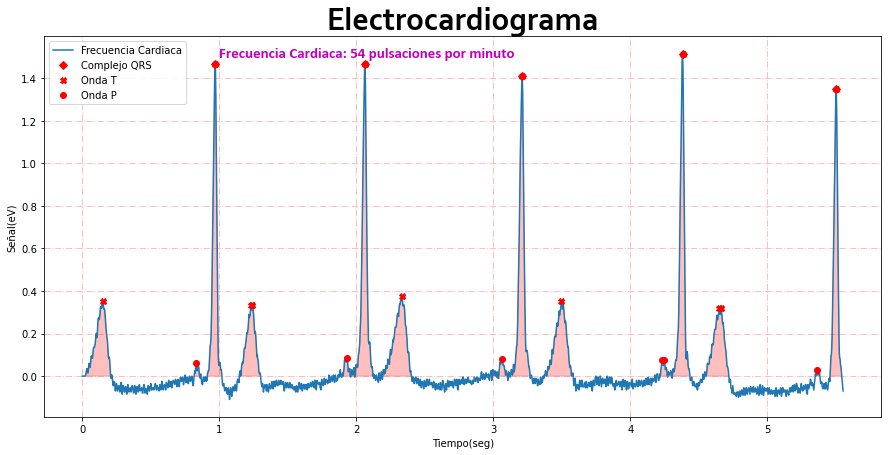


A continuación, se mostrará el Análisis del Electrocardiograma:



¿Desea guardar los resultados obtenidos antes de mostrarlo? si/no:  s



El Análisis se guardó como Electro_Escalada_Christian.txt


Resulados del Electrocardiograma:

Nombre del Paciente:   Christian
Apellido del Paciente: Escalada
Sexo del Paciente:     Masculino
Edad del Paciente:     32 años
Peso del Paciente:     78 kilos

Frecuancia Cardiaca del Paciente: 54 pulsaciones por minuto,
el Electrocardiograma fue tomado mientras el paciente dormía.
Frecuencia Cardiaca Máxima: 193 pulsaciones por minuto.

Desarrollado por: Electrocardiograma.py

¡Muchas Gracias por utilizar Este Programa!
¡Que tenga un Buen Día!.


In [18]:
import os
import pandas as pd
from scipy.signal import find_peaks
from matplotlib import pyplot as plt

df = pd.read_excel("electrocardiograma.xlsx", usecols=["señal","tiempo"])

print("\nBienvenido a Electrocardiograma.py\n")
print("Comenzemos cargando los datos del paciente:")

def Nombre(): #básico: no acepta white space
    nombre=(((input("\nIngrese Nombre: ")).strip()).lower()).capitalize()
    if nombre.isalpha():
        print("Nombre ingresado correctamente")
        print(nombre)
        return nombre
    else:
        print("ERROR: Ingrese Nombre nuevamente")
        return Nombre()

Nombre=Nombre()

def Apellido(): #básico: no acepta white space
    apellido=(((input("\nIngrese Apellido: ")).strip()).lower()).capitalize()
    if apellido.isalpha():
        print("Apellido ingresado correctamente")
        print(apellido)
        return apellido
    else:
        print("ERROR: Ingrese Apellido nuevamente")
        return Apellido()

Apellido=Apellido()

def Sexo():
    sexo=(((input("\nIngrese Sexo: ")).strip()).lower()).capitalize()
    if sexo == "Masculino" or sexo == "M":
        print("Sexo ingresado correctamente")
        sexo = "Masculino"
        print(sexo)
        return sexo
    elif sexo == "Femenino" or sexo == "F":
        print("Sexo ingresado correctamente")
        sexo = "Femenino"
        print(sexo)
        return sexo
    else:
        print("ERROR: Ingrese Sexo nuevamente")
        return Sexo()

Sexo=Sexo()

def Edad(): 
    edad=((input("\nIngrese Edad: ")).strip())
    if edad.isdigit():
        if int(edad) >=10 and int(edad)<=90:
            print("Edad ingresada correctamente")
            print(edad,"Años")
            return edad
        else:
            print("ERROR: Solo se permite edad entre 10 a 60 años")
            return Edad()
            
    else:
        print("ERROR: Ingrese Edad nuevamente")
        return Edad()

Edad=Edad()

def Peso():
    peso = (input("Ingrese Peso en kilos: ")).strip()

    if peso.isdigit() is True:
        if (int(peso) >= 45) & (int(peso) <= 100):
            print("Peso ingresado correctamente")
            print(peso,"Kg")
            return peso
        else:
            print("ERROR, Vuelva a ingresar Peso correctamente")
            print("El Peso permitido para el calculo de FCM es entre 45 kilos y 100 kilos")
            return Peso()

    else:
        print("ERROR, Vuelva a ingresar Peso correctamente")
        return Peso()

Peso=Peso()
    
print("\nCargando Electrocardiograma del Paciente:",f"{Nombre} {Apellido}", "en Formato Excel:\n","\n",df)
print("\n¡El Electrocardiograma se cargó correctamente!")


def SaveFig():  # Guarda el gráfico en archivo .PNG
    respuesta=(((input("¿Desea descargar el gráfico del Electrocardiograma? Si/No: ")).strip()).lower()).capitalize()
    if respuesta == "Si" or respuesta == "S":
        print(f"\nEl gráfico se descagó como Electro_{Apellido}_{Nombre}.png\n")
        return plt.savefig(f"Electro_{Apellido}_{Nombre}.png")
    if respuesta == "No" or respuesta == "N":
        print("Respuesta ingresada correctamente")
    else:
        print("ERROR: Ingrese respuesta nuevamente")
        return SaveFig()

print("\nAhora vamos a graficar y guardar el Electrocardiograma\n")
y=df["señal"]
x=df["tiempo"]
plt.figure(figsize=(15, 7))
plt.plot(x,y,label="Frecuencia Cardiaca")

peaks, _ = find_peaks(y, height=1.2)
plt.plot(x[peaks], y[peaks], "rD",label="Complejo QRS")

peaks, properties = find_peaks(y, prominence=(0.35),)
properties["prominences"].max()
plt.plot(x[peaks], y[peaks], "rX",label="Onda T")

peaks, properties = find_peaks(y, prominence=(0.08, 0.1))
properties["prominences"].max()
plt.plot(x[peaks], y[peaks], "ro",label="Onda P")

plt.fill_between(x,y,0,where=(y>0), color='r', alpha=0.25,)

pulso=int(60*5/x[-1:]) # regla de 3 simple
plt.text(1,1.5,f"Frecuencia Cardiaca: {pulso} pulsaciones por minuto", font="Calibri", fontsize=15, fontweight='bold', color='m')

plt.title("Electrocardiograma",font="corbel",fontstyle='normal',fontsize=32,color="black", fontweight ="bold")
plt.ylabel('Señal(eV)')  
plt.xlabel('Tiempo(seg)')
plt.legend(loc="upper left")
plt.grid(color='r', linestyle='-.', linewidth=1,alpha=0.25,)
SaveFig()
plt.show()

#Analizamos la Frecuencia Cardiaca:

# Se determina la condición en la que se le tomó al paciente la frecuancia cardiaca:
if (pulso >= 100) & (pulso <= 200): 
    text = "el Electrocardiograma fue tomado mientras el paciente hacia actividad física."

elif (pulso >= 60) & (pulso < 100):  
    text = "el Electrocardiograma fue tomado mientras el paciente estaba en reposo."

elif (pulso >= 40) & (pulso < 60):  
    text = "el Electrocardiograma fue tomado mientras el paciente dormía."

else:  # este en caso de que los valores superen los maximos y minimos normales
    text = "¡valores fuera de rango! cosulte a su médico especialista, " \
           "usted deberia tener una frecuencia cardiaca de entre: 40 a 200 ppm."

#Calculamos y analizamos la Frecuencia Cardiaca Máxima:
if Sexo == "masculino":
    Frec_Card_Max = ((210 - (0.5 * float(Edad))) - (0.01 * float(Peso)) + 4)
else:
    Frec_Card_Max = (210 - (0.5 * float(Edad))) - (0.01 * float(Peso))

print("\nA continuación, se mostrará el Análisis del Electrocardiograma:\n")

def Guardar_O_Mostrar_texto():
    si_no_texto = (str(input("¿Desea guardar los resultados obtenidos antes de mostrarlo? si/no: ")).lower()).strip()
    if si_no_texto == "si" or si_no_texto == "s":
        print(f"\nEl Análisis se guardó como Electro_{Apellido}_{Nombre}.txt")
        print("\n")
        Guardar_texto()
    elif si_no_texto == "no" or si_no_texto == "n":
        print("\n")
        Mostrar_texto()
    else:
        print("ERROR, Escriba nuevamente que quiere hacer")
        return Guardar_O_Mostrar_texto()

def Mostrar_texto():
    # Muestra el análisis del paciente sin guardar en formato .txt
    print("Resulados de Electrocardiograma:" + os.linesep)
    print("Nombre del Paciente:   ", str(Nombre).capitalize())
    print("Apellido del Paciente: ", str(Apellido).capitalize())
    print("Sexo del Paciente:     ", str(Sexo).capitalize())
    print("Edad del Paciente:     ", str(Edad), " años")
    print("Peso del Paciente:     ", str(Peso), " kilos" + os.linesep)
    print('Frecuancia Cardiaca del Paciente: ', str(int(pulso)), ' pulsaciones por minuto,')
    print(text)
    print("Frecuencia Cardiaca Máxima: ", str(int(Frec_Card_Max)), " pulsaciones por minuto.")
    print("\nDesarrollado por: Electrocardiograma.py" + os.linesep)
    print("¡Muchas Gracias por utilizar Este Programa!\n¡Que tenga un Buen Día!.")    

def Guardar_texto():
    # Se crea el archivo .txt en el mismo lugar donde se encentra nuestro codigo .py
    Nombre_Texto=(f"Electro_{Apellido}_{Nombre}")
    file = open(Nombre_Texto + ".txt", "w", encoding="utf-8")
    file.write("Resulados del Electrocardiograma:" + os.linesep)
    file.write(f"Nombre del Paciente:   {(str(Nombre)).capitalize()}")
    file.write(f"\nApellido del Paciente: {(str(Apellido)).capitalize()}")
    file.write(f"\nSexo del Paciente:     {(str(Sexo)).capitalize()}")
    file.write(f"\nEdad del Paciente:     {str(Edad)} años")
    file.write(f"\nPeso del Paciente:     {str(Peso)} kilos"+ os.linesep)
    file.write(f"Frecuancia Cardiaca del Paciente: {str(int(pulso))} pulsaciones por minuto,\n")
    file.write(text)
    file.write(f"\nFrecuencia Cardiaca Máxima: {str(int(Frec_Card_Max))} pulsaciones por minuto."+ os.linesep)
    file.write("Desarrollado por: Electrocardiograma.py" + os.linesep)
    file.write("¡Muchas Gracias por utilizar Este Programa!\n¡Que tenga un Buen Día!.")
    file.close()
    # Se visualiza el archivo .txt
    file = open(Nombre_Texto + ".txt", "r", encoding="utf-8")
    contenido = file.read()
    print(contenido)
    file.close()    


if __name__ == "__main__":
    Guardar_O_Mostrar_texto()

